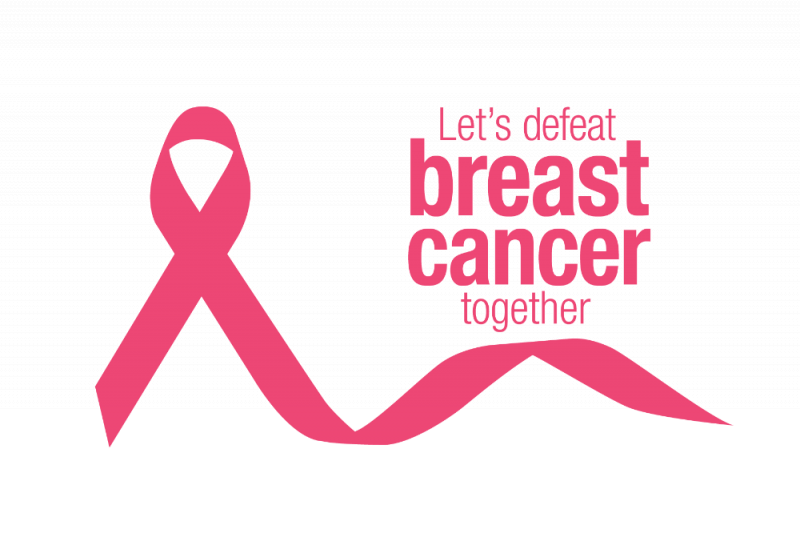

**Attribute Information:**
   * ID number
   * Diagnosis (M = malignant, B = benign)
   
**Ten real-valued features are computed for each cell nucleus:**
   * radius (mean of distances from center to points on the perimeter)
   * texture (standard deviation of gray-scale values)
   * perimeter
   * area
   * smoothness (local variation in radius lengths)
   * compactness (perimeter^2 / area - 1.0)
   * concavity (severity of concave portions of the contour)
   * concave points (number of concave portions of the contour)
   * symmetry
   * fractal dimension ("coastline approximation" - 1)

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
# read the dataset
df=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.head()

In [ ]:
df.shape 

In [ ]:
#information about the dataset
df.info()

In [ ]:
#description about the dataset
df.describe()

In [ ]:
# dropping unncessary columns
df.drop("Unnamed: 32",axis=1,inplace=True)


In [ ]:
#checking missing values
df.isnull().sum()

In [ ]:
import missingno as msno
msno.bar(df)

# Exploratory Data analysis

## Univariate Analysis

In [ ]:
fig= px.histogram(df, x='diagnosis',color='diagnosis', barmode='group')
fig.show()

In [ ]:
df.columns

In [ ]:
fig = px.pie(df, values='radius_mean', names='diagnosis', title='Relation')
fig.show()

## Multivariate Analysis

### Positive Correlation

In [ ]:
#postive correlation
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='perimeter_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='area_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='texture_mean',y='texture_worst',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_worst',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][1])
plt.show()

### 2.Negative Correlation

In [ ]:
#negative correlation
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='area_mean',y='fractal_dimension_mean',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='radius_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='smoothness_se',y='perimeter_mean',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][1])

### Scatterplot using plotly

In [ ]:
fig = px.scatter(df,x='radius_mean',y='perimeter_mean',color='diagnosis',size_max=60)
fig.show()


In [ ]:
fig2=px.scatter(df,x='texture_worst',y= 'symmetry_worst',color='diagnosis',size_max=60)
fig2.show()

### Distribution plot

In [ ]:
import plotly.figure_factory as ff


hist_data = [df['radius_mean']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

### Correlation metric

In [ ]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=.5)

# Data Preprocessing

In [ ]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
labelencode = LabelEncoder()
y=labelencode.fit_transform(y)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
#applying standard scaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

# Keras for classification

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
#adding the input and first hidden layer

classifier.add(Dense(16, activation='relu', kernel_initializer='glorot_uniform',input_dim=30))

#adding second layer
classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform'))

#adding the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(X_train,y_train,batch_size=100,epochs=150)

In [ ]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [ ]:
from sklearn.metrics import accuracy_score


print(f"The test accuracy is very high i.e.{accuracy_score(y_test,y_pred)}")

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
sns.heatmap(cm,annot=True)


## Using Keras, We get a good model accuracy i.e. greater than 98%.

### If you like the work ,Upvote it.
### Any suggestion is welcomed.